# Avacado Project

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 


Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [63]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [64]:
# Let's Load the data set.
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [65]:
# Column unnamed in the data set can be dropped as it is of no relevence.
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [66]:
df.shape

(18249, 13)

This dataset contains:18249 rows and 13 columns.
avarage price of the avacado remains the target and rest columns are its features.

In [67]:
# getting the names of the column
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Target column being Average price the feature columns remain quite self explainatory from the problem statment.

In [68]:
# let's check for the types ao datset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

the columns 1. Date, 2.type and 3.region are object type, year in int type and the remaining columns(9) are of float type.

In [69]:
# findind the missimg values if any.
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From the obseravtion there are no null or missing values in the dataset.

In [70]:
#getting the information
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


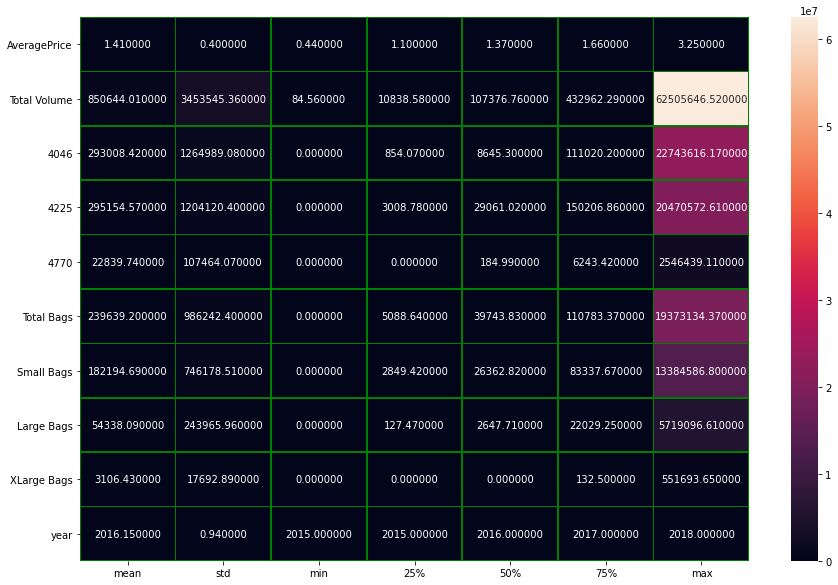

In [71]:
#heatmap for describe chart
plt.figure(figsize=[15,10])
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.70, linecolor='green', fmt='f')
plt.show()

In [72]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


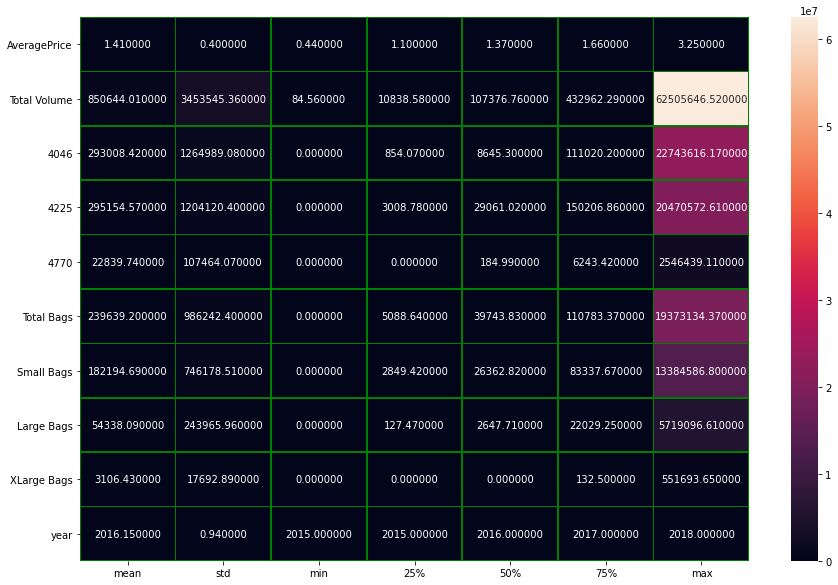

In [73]:
#heatmap for correlation chart
plt.figure(figsize=[15,10])
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=0.70, linecolor='green', fmt='f')
plt.show()

Inference from correlation:
Month column has 16% correlation and year has 9% correlation with has a good bond with target and rest all columns seems to have a weak bond.

In [74]:
#Label encoding on 'type' and 'region' column to get uniform type data from categorical to numerical data.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['region'])
le.classes_
df['region'] = le.transform(df['region'])
le.fit(df['type'].drop_duplicates())
le.classes_
df['type'] = le.transform(df['type'])

In [75]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [76]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


In [77]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

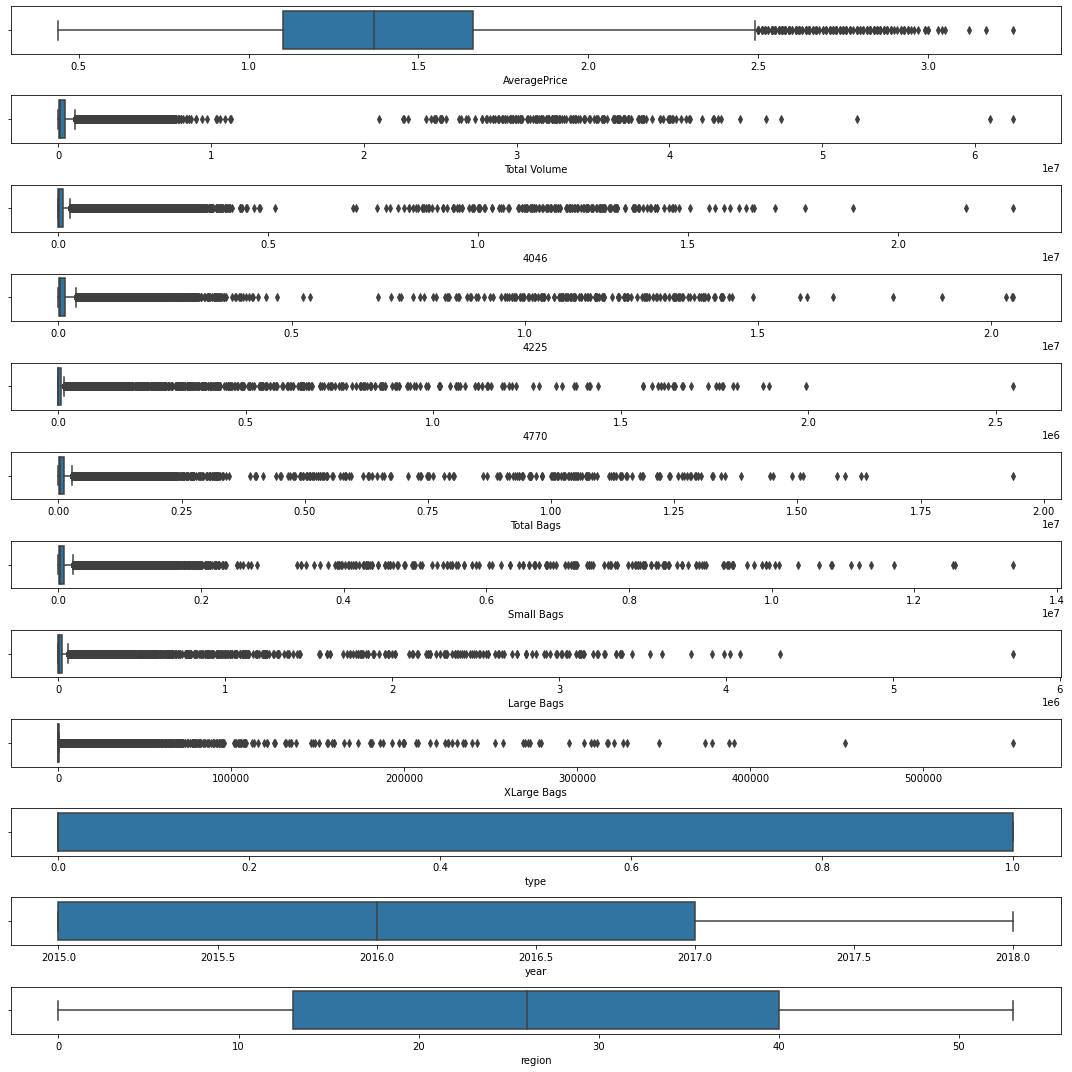

In [78]:
# checking for outliers
fig, axs = plt.subplots(12, figsize=[15,15])

plt1 = sns.boxplot(df['AveragePrice'], ax=axs[0])
plt2 = sns.boxplot(df['Total Volume'], ax = axs[1])
plt3 = sns.boxplot(df['4046'], ax = axs[2])
plt4 = sns.boxplot(df['4225'], ax=axs[3])
plt5 = sns.boxplot(df['4770'], ax = axs[4])
plt6 = sns.boxplot(df['Total Bags'], ax= axs[5])
plt7 = sns.boxplot(df['Small Bags'], ax = axs[6])
plt8 = sns.boxplot(df['Large Bags'], ax= axs[7])
plt9 = sns.boxplot(df['XLarge Bags'], ax = axs[8])
plt10 = sns.boxplot(df['type'], ax = axs[9])
plt11 = sns.boxplot(df['year'], ax = axs[10])
plt12 = sns.boxplot(df['region'], ax = axs[11])

plt.tight_layout()

We can see the presence of ouliers in our data set. only columns :type, year and region are free of outliers.

In [79]:
#checking for skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Considering the threshold of skewness to be +/- 0.5 columns like Total Volume,4046,4225,4770, Total Bags,Small Bags, Large Bags and XLarge Bags have skewness.

In [80]:
# Dropping 'Date' column from the dataset.

df = df.drop(['Date'], axis = 1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [81]:
#Removing outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(18249, 12)

In [82]:
thershold = 3
print(np.where (z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [83]:
# Assigning the values to df_new which are less of thershold value and removing the outliers
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 12)
(17651, 12)


In [84]:
# Checking percentage of data loss:

loss_per = ((18249-17651)/18249)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.276891884486821


In [85]:
#Routing data into features and label
x=df_new.drop(['AveragePrice'],axis=1)
y=df_new['AveragePrice']

In [86]:
# Power transform features to remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  0.98130886,
         1.97870686,  1.57828237],
       [-0.70179733, -0.54701087, -0.71637127, ...,  0.98130886,
         1.97870686,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ...,  0.98130886,
         1.97870686,  1.57828237]])

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.21061818, -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.21061818, -2.01058988],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.21061818, -2.01058988],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  0.98130886,
         1.97873539,  1.57828237],
       [-0.70179733, -0.54701087, -0.71637127, ...,  0.98130886,
         1.97873539,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ...,  0.98130886,
         1.97873539,  1.57828237]])

In [88]:
#Train split test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=35)

# Model Training

1.Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [-0.31519573  0.01858903  0.2604292   0.02390692 -0.2363335   0.20910344
 -0.03457893  0.01127818  0.17947722  0.07948776  0.01219027]
Intercept : 1.4054809802145243


In [90]:
# predicting for new values 
LR_pred = LR.predict(x_test)
LR_pred

array([1.6709585 , 1.59558306, 1.43406566, ..., 1.52273689, 1.49584027,
       1.86901908])

2.Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor 

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [92]:
# predicting for new values 
DT_pred = LR.predict(x_test)
DT_pred

array([1.6709585 , 1.59558306, 1.43406566, ..., 1.52273689, 1.49584027,
       1.86901908])

3.KNN Model

In [93]:
# predicting for new values 
KNN_pred = LR.predict(x_test)
KNN_pred

array([1.6709585 , 1.59558306, 1.43406566, ..., 1.52273689, 1.49584027,
       1.86901908])

Mean Absolute Error

In [94]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred))
      

Mean Absolute Error for LinearRegression is  0.20758208581326634 
 Mean Absolute Error for DecisionTreeRegressor is  0.20758208581326634 
 Mean Absolute Error for KNeighborsRegressor is  0.20758208581326634


Root Mean Square

In [95]:
from sklearn import metrics

rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))


print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)


Root Mean Squared Error for LinearRegression is  0.2617622334036396
Root Mean Squared Error for DecisionTreeRegressor is  0.2617622334036396
Root Mean Squared Error for KNeighborsRegressor is  0.2617622334036396


R-Squared

In [96]:
from sklearn.metrics import r2_score
print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred),
      '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred))   

 R2_Score for LinearRegression is  0.5309005899536772 
 R2_Score for DecisionTreeRegressor is  0.5309005899536772 
 R2_Score for KNeighborsRegressor is  0.5309005899536772


As per the observation all three models are depecting the same values of Mean Absolute error,Root Mean Squred Error and R Sqaure. so either one of the model can be chosen.

Model Saving


In [102]:
import pickle
filename = 'Ava_cado.pkl'
pickle.dump(al, open(filename, 'rb'))

NameError: name 'al' is not defined